# 1. Perkenalan

## Pendahuluan

Our Members:

- Safril Ahmadi Sanmas / PYTN-KS17-022
- Maulana Ridhwan Riziq / PYTN-KS17-010
- Nadyla Alfiena Candra / PYTN-KS17-012
- Novi Sabaniatir Rohmah / PYTN-KS17-023

Data merupakan angka historis yang memiliki banyak sekali manfaat. Selama ini pemanfaatan dari data sendiri cukup beragam seperti untuk melihat trend hingga untuk melakukan prediksi atas suatu peristiwa. Salah satu pemanfaatan data untuk melakukan prediksi peristiwa dapat kita lihat melalui aplikasi ataupun website prediksi cuaca. Tujuan dari pembuatan aplikasi/website prediksi cuaca yaitu memprediksi perkiraan cuaca yang akan terjadi di beberapa hari ke depan. Lalu, manfaat dari prediksi tersebut yaitu untuk membantu serta memberikan informasi kepada masyarakat terkait perkiraan cuaca yang akan datang. Harapannya prediksi tersebut dapat membantu masyarakat untuk menjaga kenyamanan, keamanan serta keselamatannya.

Dataset yang digunakan yaitu Rain in Australia yang berisi record data hujan harian selama 10 tahun di Australia. Kolom RainTomorrow adalah target variable yang mau diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain:

- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.


Objective :
 - Mampu memahami konsep logistic regression dan Support Vector Machine (SVM).
Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan Support Vector Machine (SVM).
Mampu mengimplementasikan Logistic Regression dan Support Vector Machine (SVM) untuk membuat prediksi

# 2. Import Pustaka

Pada bagian ini adalah mengimport pustaka yang akan digunakan untuk analisis data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date
import calendar

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 3. Data Loading

Memasukkan dataframe, kali ini menggunakan dataframe **Weather AUS** pada tahun 2008 - 2017.

In [2]:
df = pd.read_csv("D:/Python for Data Science/Data/weatherAUS.csv") 
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# menyalin dataframe
dc = df.copy()

In [4]:
# Menampilkan semua kolom dataframe
pd.set_option('display.max_columns', 500)

In [5]:
# Melihat dimensi dataframe
dc.shape

(145460, 23)

Dari hasil di atas, dapat dilihat bahwa jumlah data yang dimiliki sebanyak 145,460 baris dan 23 kolom.

In [6]:
# Melihat 5 data teratas
dc.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
# Melihat 5 data terbawah
dc.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
# Melihat informasi data
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dari hasil di atas diketahui bahwa pada dataframe tipe data object sebanyak 7, dan float64 sebanyak 16.

In [9]:
# Melihat jumlah nilai unique dari data
dc.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

berikut kita melihat nila unique pada data yang memiliki type data object.

In [10]:
objek = dc[['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']]

In [11]:
# Mencari nilai unique pada data
for col in objek.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*40)
    print(objek[col].unique())
    print("="*40)

UNIQUE VALUES FOR  Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
UNIQUE VALUES FOR  Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
UNIQUE VALUES FOR  WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
UNIQUE VALUES FOR  WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
UNIQUE VALUES FOR  WindDir3pm
['WNW' 'W

In [12]:
# Melihat Statistik Dataframe secara umum
dc.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [13]:
#Melihat Statistik deskriptif dari kolom yang bertipe object
dc.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


# 4. Data Cleaning

In [14]:
# Mengecek duplikat pada data
dc.duplicated().sum()

0

Pada dataframe tidak memiliki nilai duplikat. selanjutnya melihat nilai missing pada dataframe.

In [15]:
# Mengecek missing value pada data
dc.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terlihat bahwa dataframe memiliki nilai missing yang banyak. selanjutnya kita melihat jumlah missing dalam bentuk persen (%) untuk membuang kolom yang kiranya memiliki nilai missing lebih dari 35%.

In [16]:
# Menampilkan jumlah missing value dalam jumlah (%)
print(dc.apply(lambda x: f'{(x.isnull().sum() / dc.shape[0] * 100):.2f}%'))

Date              0.00%
Location          0.00%
MinTemp           1.02%
MaxTemp           0.87%
Rainfall          2.24%
Evaporation      43.17%
Sunshine         48.01%
WindGustDir       7.10%
WindGustSpeed     7.06%
WindDir9am        7.26%
WindDir3pm        2.91%
WindSpeed9am      1.21%
WindSpeed3pm      2.11%
Humidity9am       1.82%
Humidity3pm       3.10%
Pressure9am      10.36%
Pressure3pm      10.33%
Cloud9am         38.42%
Cloud3pm         40.81%
Temp9am           1.21%
Temp3pm           2.48%
RainToday         2.24%
RainTomorrow      2.25%
dtype: object


Dari hasil di atas, diketahui kolom yang memiliki jumlah missing lebih dari 35% adalah 'Evaporation', 'Sunshine', 'Cloud9am', dan 'Cloud3pm'. Selanjutnya adalah membuang data tersebut dikarenakan memiliki jumlah missing yang sangat banyak.

In [17]:
# Membuang data yang missing value
dc.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [18]:
dc.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [19]:
# Melihat dimensi dataframe
dc.shape

(145460, 19)

In [20]:
# Mengecek lagi apakah masih terdapat missing value
dc.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Dikarenakan masih terdapat missing value pada dataframe, maka perlu dilakukan pengisian nilai pada missing value.

## 4.1 Mengisi Missing Value

In [21]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

### 4.1.1 Mengisi missing value untuk tipe data numerik

sebelum mengisi, kita perlu memisahkan berdasarkan type data.

In [22]:
num_cols = dc.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


Untuk data numerik kita akan mengisi dengan nilai mean, dikarenakan mean sensitif dengan outliers, maka perlu dilakukan pengecekan. apabila terdapat outliers, maka perlu dihilangkan outliers tersebut.

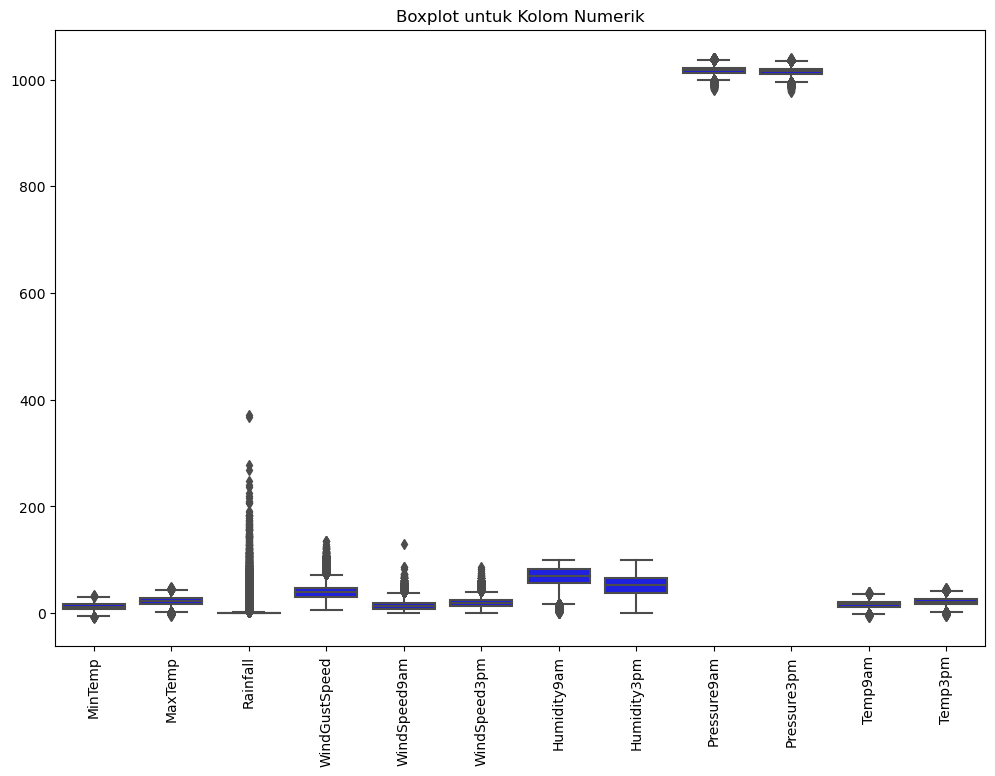

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(dc[num_cols], showfliers=True, color='blue')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot untuk Kolom Numerik')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

Dari plot tersebut. terlihat bahwa hanya kolom 'Humidity3pm' yang tidak terdapat outliers, untuk menghilangkan outliers kita menggunakan metode IQR Outlier Removal.

In [24]:
data_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',  'Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm']
for data in data_outliers:
    q1 = dc[data].quantile(0.25)
    q3 = dc[data].quantile(0.75)
    IQR = q3-q1
    limit_bawah = q1 - (IQR * 1.5)
    limit_atas = q3 + (IQR * 1.5)
    dc.loc[dc[data] < limit_bawah, data] = limit_bawah
    dc.loc[dc[data] > limit_atas, data] = limit_atas

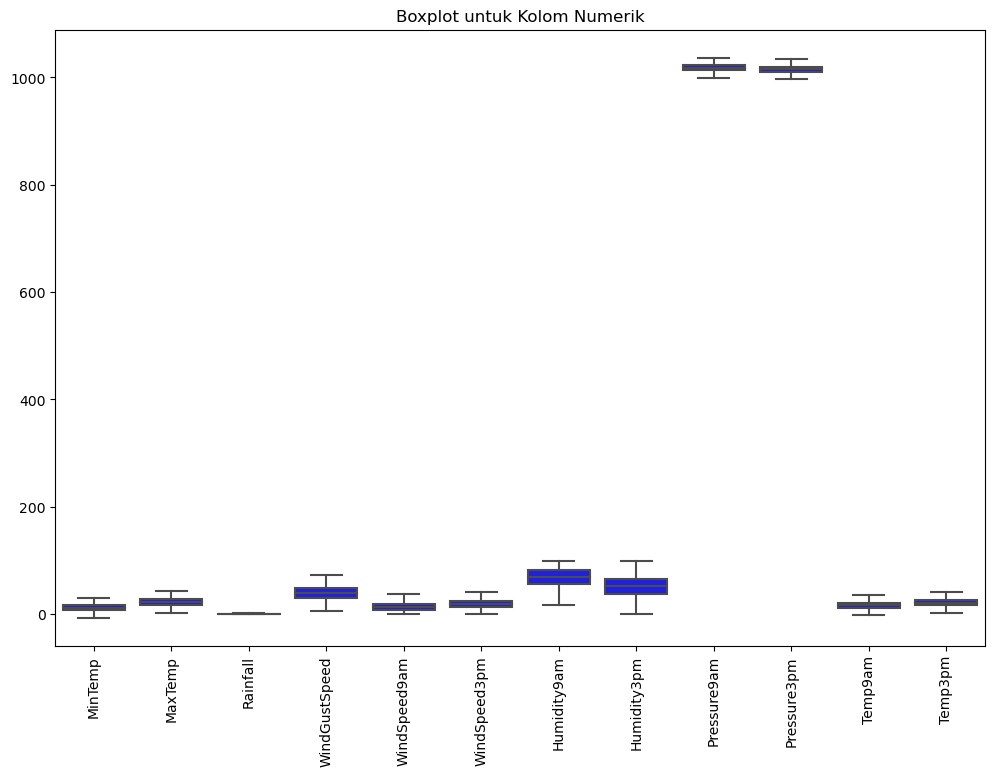

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(dc[num_cols], showfliers=True, color='blue')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot untuk Kolom Numerik')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

Setelah menghilangkan outliersnya, selanjutnya mengisi missing value dengan menggunakan rata-rata (mean).

In [26]:
# Mengisi missing value
for col in num_cols:
    if dc[col].isnull().sum() > 0:
        nilai_rata = dc[col].mean()
        dc[col].fillna(nilai_rata, inplace=True)

In [27]:
# Mengecek lagi apakah masih terdapat missing value
dc.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

Dari hasil tersebut, terlihat tidak terdapat missing value pada kolom numerik.

### 4.1.1 Mengisi missing value untuk tipe data categorikal

In [28]:
kolom_kategori = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in kolom_kategori :
    dc[col] = dc[col].astype('category')

Untung mengisi missing value pada kolom kategori, kita menggunakan metode pengisian mundur (backward fill atau bfill) diikuti oleh pengisian maju (forward fill atau ffill)

In [29]:
# Mengisi nilai missing value menggunakan metode pengisian mundur (backward fill atau bfill) diikuti oleh pengisian maju (forward fill atau ffill)
dc[kolom_kategori] = dc[kolom_kategori].fillna(method='bfill').fillna(method='ffill')

In [30]:
# Mengecek missing value pada kolom kategori
dc[kolom_kategori].isna().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

# 5. Explorasi Data Analysis

In [31]:
# Mengubah kolom date menjadi tipe data datetime
dc['Date']=pd.to_datetime(dc['Date'])

In [32]:
# Membuat kolom Day, Month, dan Year
dc['Day'] = dc['Date'].dt.day
dc['Month'] = dc['Date'].dt.month
dc['Year'] = dc['Date'].dt.year

In [33]:
# Menampilkan 5 data teratas
dc.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


In [34]:
# Menyalin data
dc1 = dc.copy()

In [35]:
# Melihat informasi data
dc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  category      
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  category      
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  category      
 8   WindDir3pm     145460 non-null  category      
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

In [36]:
# Menghitung rata-rata 'MaxTemp' per tahun
rata_rata_per_tahun = dc1.groupby('Year')['MaxTemp'].mean()
print(rata_rata_per_tahun)

Year
2007    25.086885
2008    22.875594
2009    23.254480
2010    22.581746
2011    22.548081
2012    22.319026
2013    23.292891
2014    23.792756
2015    23.512778
2016    23.421912
2017    25.009783
Name: MaxTemp, dtype: float64


Dari hasil di atas, diketahui bahwa rata-rata temperatur maksimal paling tinggi berada di tahun 2007 dengan rata-rata 'MaxTemp' 25.086885.

In [37]:
# Menghitung rata-rata 'MinTemp' per tahun
Mean_MinTemp_per_tahun = dc1.groupby('Year')['MinTemp'].mean()
print(Mean_MinTemp_per_tahun)

Year
2007    12.545902
2008    12.449752
2009    12.160611
2010    12.094490
2011    12.023538
2012    11.229217
2013    11.898230
2014    12.404057
2015    12.234989
2016    12.560786
2017    13.694101
Name: MinTemp, dtype: float64


Dari hasil di atas, diketahui bahwa rata-rata temperatur minimum paling rendah berada di tahun 2012 dengan rata-rata 'MinTemp' 11.229217.

In [38]:
# Menghitung rata-rata 'Rainfall' tiap wilayah per tahun
rata_rata_curah_hujan_per_tahun = dc1.groupby(['Location', 'Year'])['Rainfall'].mean()
print(rata_rata_curah_hujan_per_tahun.to_string())

Location          Year
Adelaide          2007         NaN
                  2008    0.511794
                  2009    0.458799
                  2010    0.483078
                  2011    0.508612
                  2012    0.474353
                  2013    0.549939
                  2014    0.439749
                  2015    0.439003
                  2016    0.533333
                  2017    0.316900
Albany            2007         NaN
                  2008    0.341935
                  2009    0.655890
                  2010    0.559452
                  2011    0.722090
                  2012    0.634328
                  2013    0.771400
                  2014    0.585852
                  2015    0.579417
                  2016    0.736746
                  2017    0.506588
Albury            2007         NaN
                  2008    0.506039
                  2009    0.445718
                  2010    0.481673
                  2011    0.481899
                  2012    0.4157

   Date  Rainfall
0  2008  0.600597
1  2009  0.495342
2  2010  0.595237
3  2011  0.616119
4  2012  0.542687
5  2013  0.451632
6  2014  0.570271
7  2015  0.591781
8  2016  0.503279
9  2017  0.680682


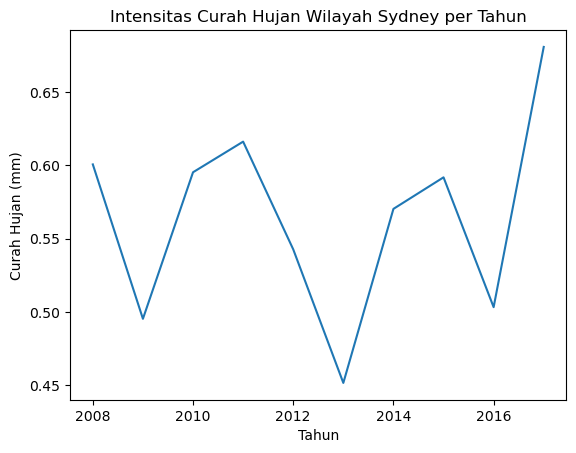

In [39]:
sydney = dc1[dc1['Location']=='Sydney']

# Group data berdasarkan tahun dan menghitung rata-rata curah hujan
sydney_per_tahun = sydney.groupby(sydney['Date'].dt.year)['Rainfall'].mean().reset_index()
print(sydney_per_tahun)

# Plot line chart
plt.plot(sydney_per_tahun['Date'], sydney_per_tahun['Rainfall'])
plt.title('Intensitas Curah Hujan Wilayah Sydney per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.show()

Dari hasil di atas, dapat dilihat bahwa curah hujan paling tinggi wilayah Sydney [2008-2017] berada di tahun 2017 

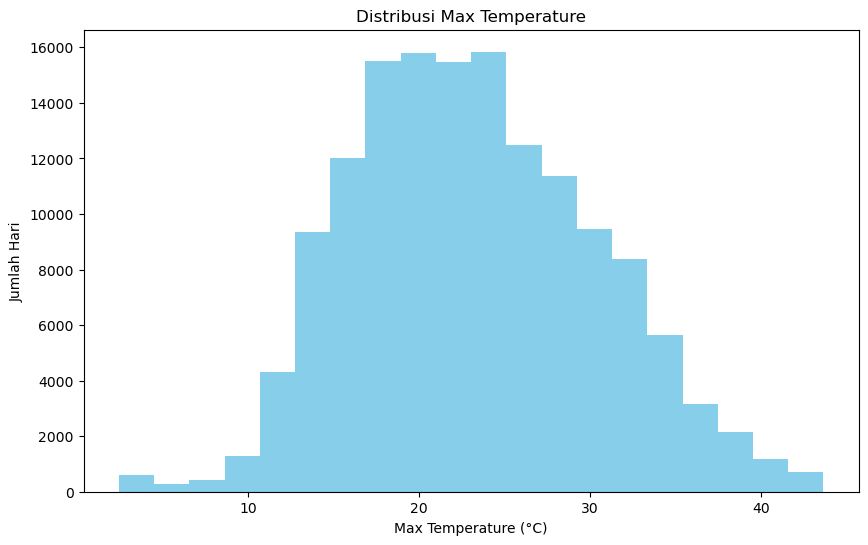

In [40]:
# Histogram untuk 'MaxTemp'
plt.figure(figsize=(10, 6))
plt.hist(dc1['MaxTemp'], bins=20, color='skyblue')
plt.title('Distribusi Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Jumlah Hari')
plt.show()

Dari plot di atas, dapat dilihat rata-rata Max Temperature [2007-2008] diantara 20 derajat.

            Location  Hari
0           Adelaide   738
1             Albany   915
2             Albury   622
3       AliceSprings   246
4      BadgerysCreek   598
5           Ballarat   783
6            Bendigo   564
7           Brisbane   714
8             Cairns   980
9           Canberra   633
10             Cobar   392
11      CoffsHarbour   878
12          Dartmoor   923
13            Darwin   852
14         GoldCoast   791
15            Hobart   764
16         Katherine   278
17        Launceston   710
18         Melbourne  1329
19  MelbourneAirport   653
20           Mildura   327
21             Moree   493
22      MountGambier   927
23       MountGinini   871
24         Newcastle   797
25              Nhil   242
26         NorahHead   832
27     NorfolkIsland   941
28         Nuriootpa   596
29        PearceRAAF   674
30           Penrith   618
31             Perth   645
32      PerthAirport   567
33          Portland  1094
34          Richmond   570
35              Sale   643
3

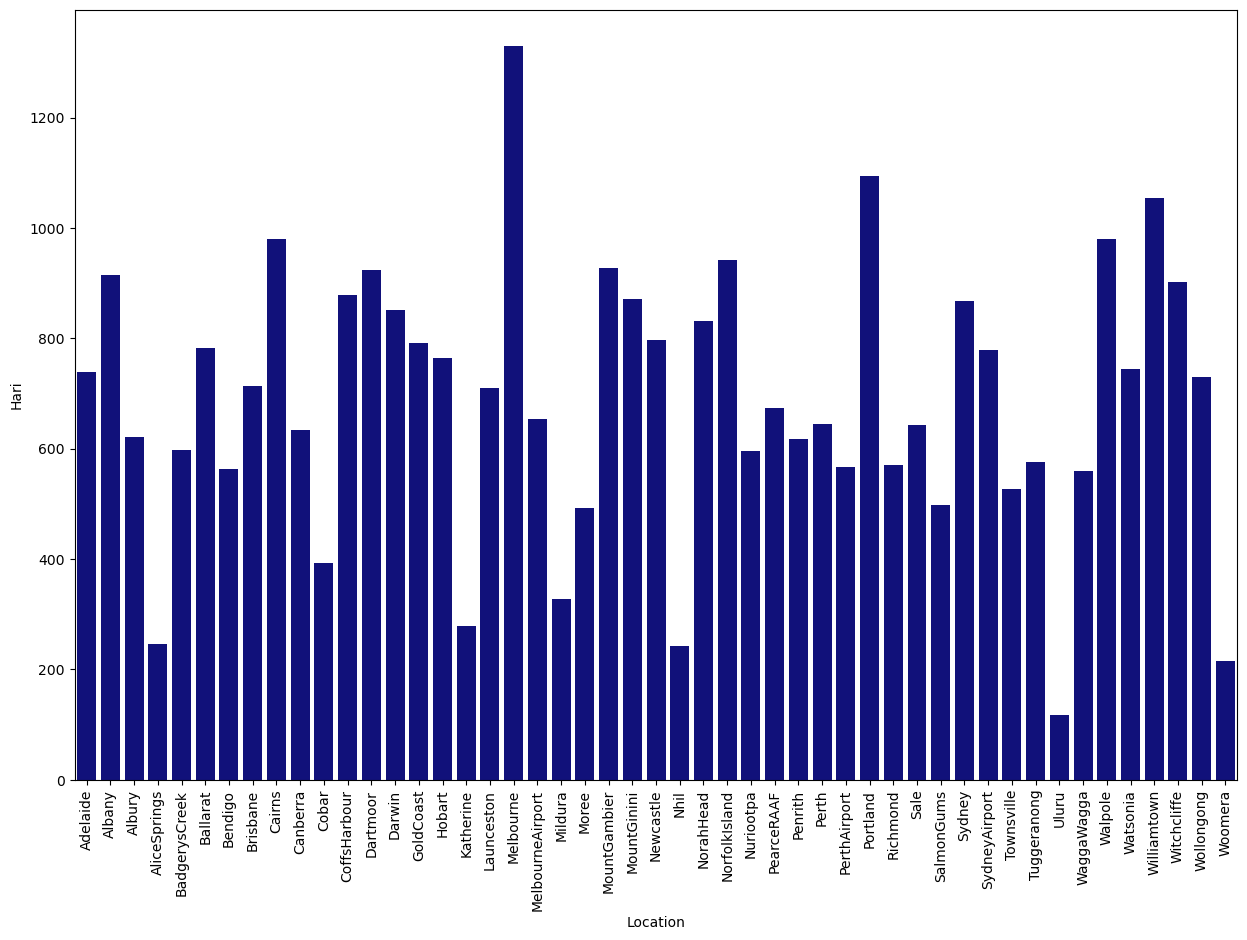

In [41]:
hujan = dc1[dc1['RainToday']=='Yes']

# Group data curah hujan berdasarkan lokasi dan jumlah terjadinya hujan
hujan_tiap_wilayah = hujan.groupby('Location')['RainToday'].count().reset_index(name='Hari')
print(hujan_tiap_wilayah)

# barplot
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Location', y = 'Hari', data = hujan_tiap_wilayah, color='darkblue')
plt.xticks(rotation='vertical') 
plt.show()        

Wilayah dengan jumlah hari turunnya hujan paling banyak yaitu Melbourne dengan jumlah hari 1329 hari dan yang paling sedikit yaitu Uluru dengan jumlah hari 117 hari di tahun [2008-2017]

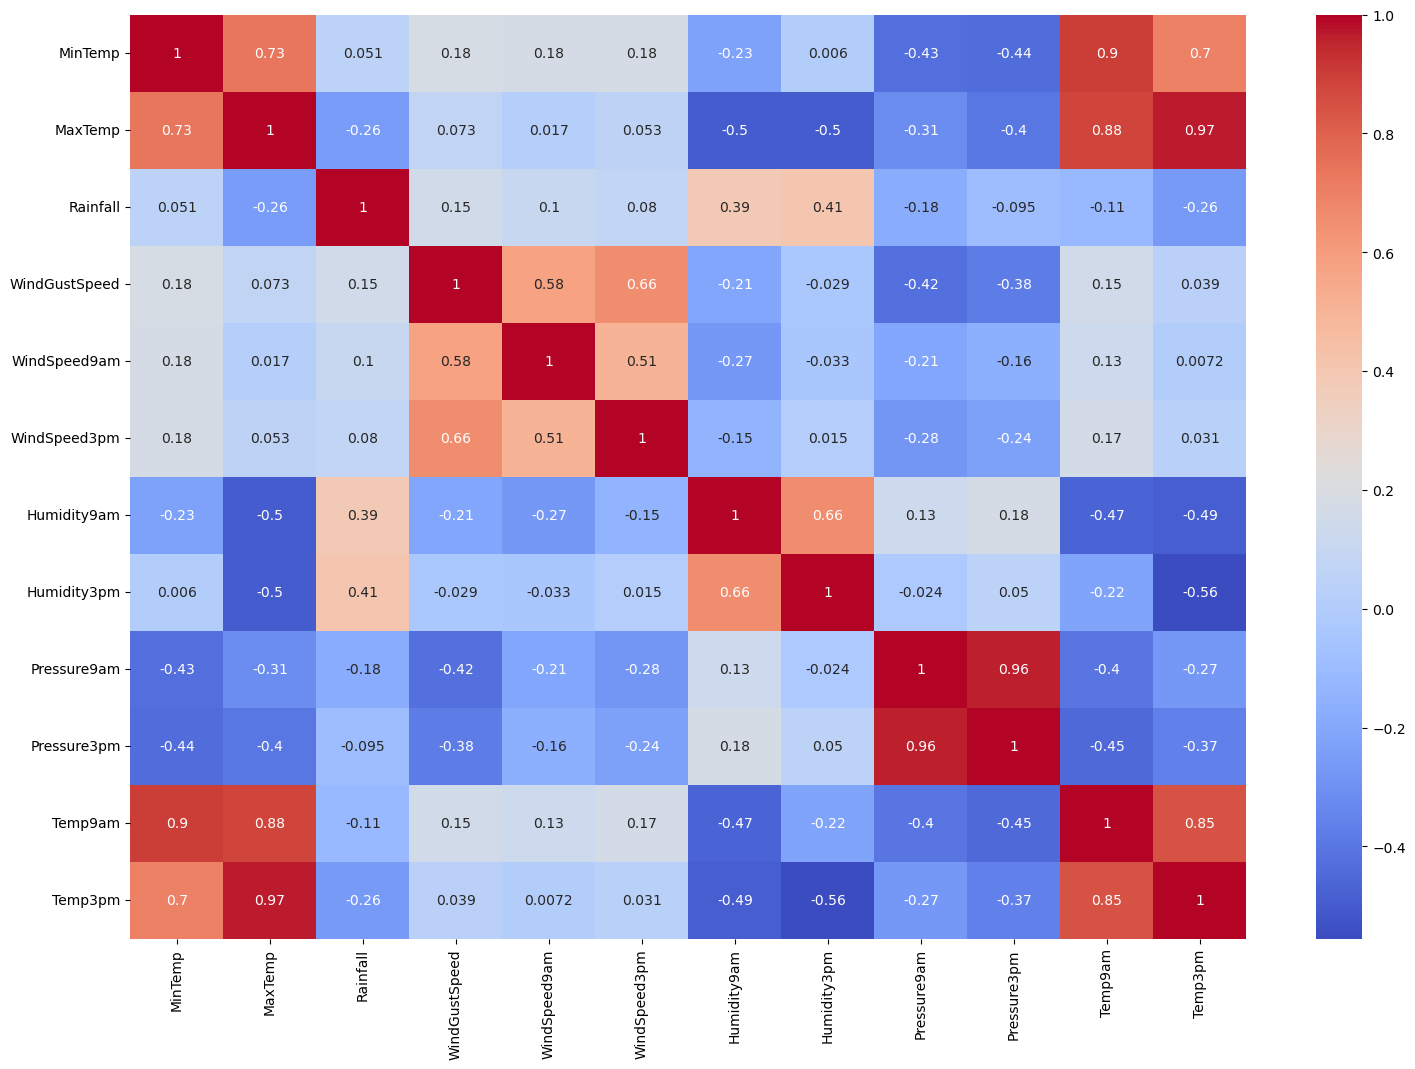

In [42]:
# Heatmap
heatmap_data = dc1.drop(['Year', 'Month', 'Day'], axis=1)

plt.figure(figsize=(18,12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [43]:
dc1.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
MinTemp,1.000000,0.733392,0.051203,0.180336,0.177534,0.177176,-0.230718,0.006033,-0.428982,-0.437161,0.897765,0.699147,0.002342,-0.202744,0.043007
MaxTemp,0.733392,1.000000,-0.255978,0.073229,0.017140,0.053117,-0.497111,-0.498544,-0.314920,-0.402168,0.879365,0.968905,0.000655,-0.163190,0.061734
Rainfall,0.051203,-0.255978,1.000000,0.151293,0.102499,0.080050,0.387454,0.406205,-0.179751,-0.095155,-0.114011,-0.260283,0.003290,0.011964,-0.014480
WindGustSpeed,0.180336,0.073229,0.151293,1.000000,0.578562,0.659350,-0.214349,-0.028868,-0.424191,-0.381720,0.154054,0.039421,-0.009631,0.058281,-0.029014
WindSpeed9am,0.177534,0.017140,0.102499,0.578562,1.000000,0.507874,-0.273399,-0.033036,-0.214427,-0.164884,0.131738,0.007197,-0.008879,0.051481,-0.017855
WindSpeed3pm,0.177176,0.053117,0.080050,0.659350,0.507874,1.000000,-0.146602,0.015137,-0.276327,-0.237763,0.165858,0.031299,-0.010331,0.058906,-0.029658
Humidity9am,-0.230718,-0.497111,0.387454,-0.214349,-0.273399,-0.146602,1.000000,0.658850,0.133181,0.177319,-0.468540,-0.489627,0.015121,-0.089070,0.009745
Humidity3pm,0.006033,-0.498544,0.406205,-0.028868,-0.033036,0.015137,0.658850,1.000000,-0.024338,0.050405,-0.216576,-0.555212,0.012813,-0.018568,-0.009463
Pressure9am,-0.428982,-0.314920,-0.179751,-0.424191,-0.214427,-0.276327,0.133181,-0.024338,1.000000,0.959981,-0.403417,-0.272115,-0.019915,0.034314,0.028290
Pressure3pm,-0.437161,-0.402168,-0.095155,-0.381720,-0.164884,-0.237763,0.177319,0.050405,0.959981,1.000000,-0.446363,-0.366309,-0.020277,0.025093,0.023126


In [44]:
dc1.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194186,23.224781,0.487224,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,16.991728,21.686191,15.712258,6.399615,2012.769751
std,6.365000,7.069787,0.783872,12.515516,8.555341,8.442182,18.703607,20.471189,6.651697,6.606721,6.441838,6.822800,8.794789,3.427262,2.537684
min,-6.350000,2.450000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,-1.650000,1.900000,1.000000,1.000000,2007.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.574162,69.000000,51.539116,1017.670297,1015.269781,16.800000,21.400000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,23.000000,9.000000,2015.000000
max,30.850000,43.650000,2.000000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,35.550000,41.100000,31.000000,12.000000,2017.000000


# 6. Pre Processing

In [45]:
dc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  category      
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  category      
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  category      
 8   WindDir3pm     145460 non-null  category      
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

In [46]:
#Membuat variabel kategori untuk  tipe data category dan boolean
kategori = dc1.select_dtypes(include=['category', 'bool']).columns.values

for col in kategori:
    print(col, "(", len(dc1[col].unique()) , "values):\n", np.sort(dc1[col].unique()))

Location ( 49 values):
 ['Adelaide' 'Albany' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat'
 'Bendigo' 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour'
 'Dartmoor' 'Darwin' 'GoldCoast' 'Hobart' 'Katherine' 'Launceston'
 'Melbourne' 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier'
 'MountGinini' 'Newcastle' 'Nhil' 'NorahHead' 'NorfolkIsland' 'Nuriootpa'
 'PearceRAAF' 'Penrith' 'Perth' 'PerthAirport' 'Portland' 'Richmond'
 'Sale' 'SalmonGums' 'Sydney' 'SydneyAirport' 'Townsville' 'Tuggeranong'
 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown' 'Witchcliffe'
 'Wollongong' 'Woomera']
WindGustDir ( 16 values):
 ['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
WindDir9am ( 16 values):
 ['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
WindDir3pm ( 16 values):
 ['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
RainToday ( 2 values):
 ['No' 'Yes']
RainTomorrow ( 2 v

In [47]:
# encode variabel kategori
label_encoder = LabelEncoder()
for cols in kategori:
    dc1[cols] = label_encoder.fit_transform(dc1[cols])
dc1

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,2,13.4,22.900000,0.6,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,12,2008
1,2008-12-02,2,7.4,25.100000,0.0,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2,12,2008
2,2008-12-03,2,12.9,25.700000,0.0,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3,12,2008
3,2008-12-04,2,9.2,28.000000,0.0,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,4,12,2008
4,2008-12-05,2,17.5,32.300000,1.0,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.400000,0.0,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,21,6,2017
145456,2017-06-22,41,3.6,25.300000,0.0,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,22,6,2017
145457,2017-06-23,41,5.4,26.900000,0.0,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,23,6,2017
145458,2017-06-24,41,7.8,27.000000,0.0,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0,24,6,2017


In [48]:
dc1.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.194186,23.224781,0.487224,7.851629,39.837792,7.304049,7.751574,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,16.991728,21.686191,0.232002,0.231981,15.712258,6.399615,2012.769751
std,14.228687,6.365000,7.069787,0.783872,4.587225,12.515516,4.526337,4.579712,8.555341,8.442182,18.703607,20.471189,6.651697,6.606721,6.441838,6.822800,0.422112,0.422099,8.794789,3.427262,2.537684
min,0.000000,-6.350000,2.450000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,-1.650000,1.900000,0.000000,0.000000,1.000000,1.000000,2007.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,0.000000,0.000000,8.000000,3.000000,2011.000000
50%,24.000000,12.100000,22.700000,0.000000,8.000000,39.000000,7.000000,8.000000,13.000000,18.574162,69.000000,51.539116,1017.670297,1015.269781,16.800000,21.400000,0.000000,0.000000,16.000000,6.000000,2013.000000
75%,36.000000,16.800000,28.200000,0.600000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000,0.000000,23.000000,9.000000,2015.000000
max,48.000000,30.850000,43.650000,2.000000,15.000000,73.500000,15.000000,15.000000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,35.550000,41.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


# 6. Defining Model

In [49]:
# Membuat dataframe baru untuk dimodelkan
dc2 = dc1[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]

In [50]:
# Menampilkan 5 teratas dataframe dc2
dc2.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


<Axes: >

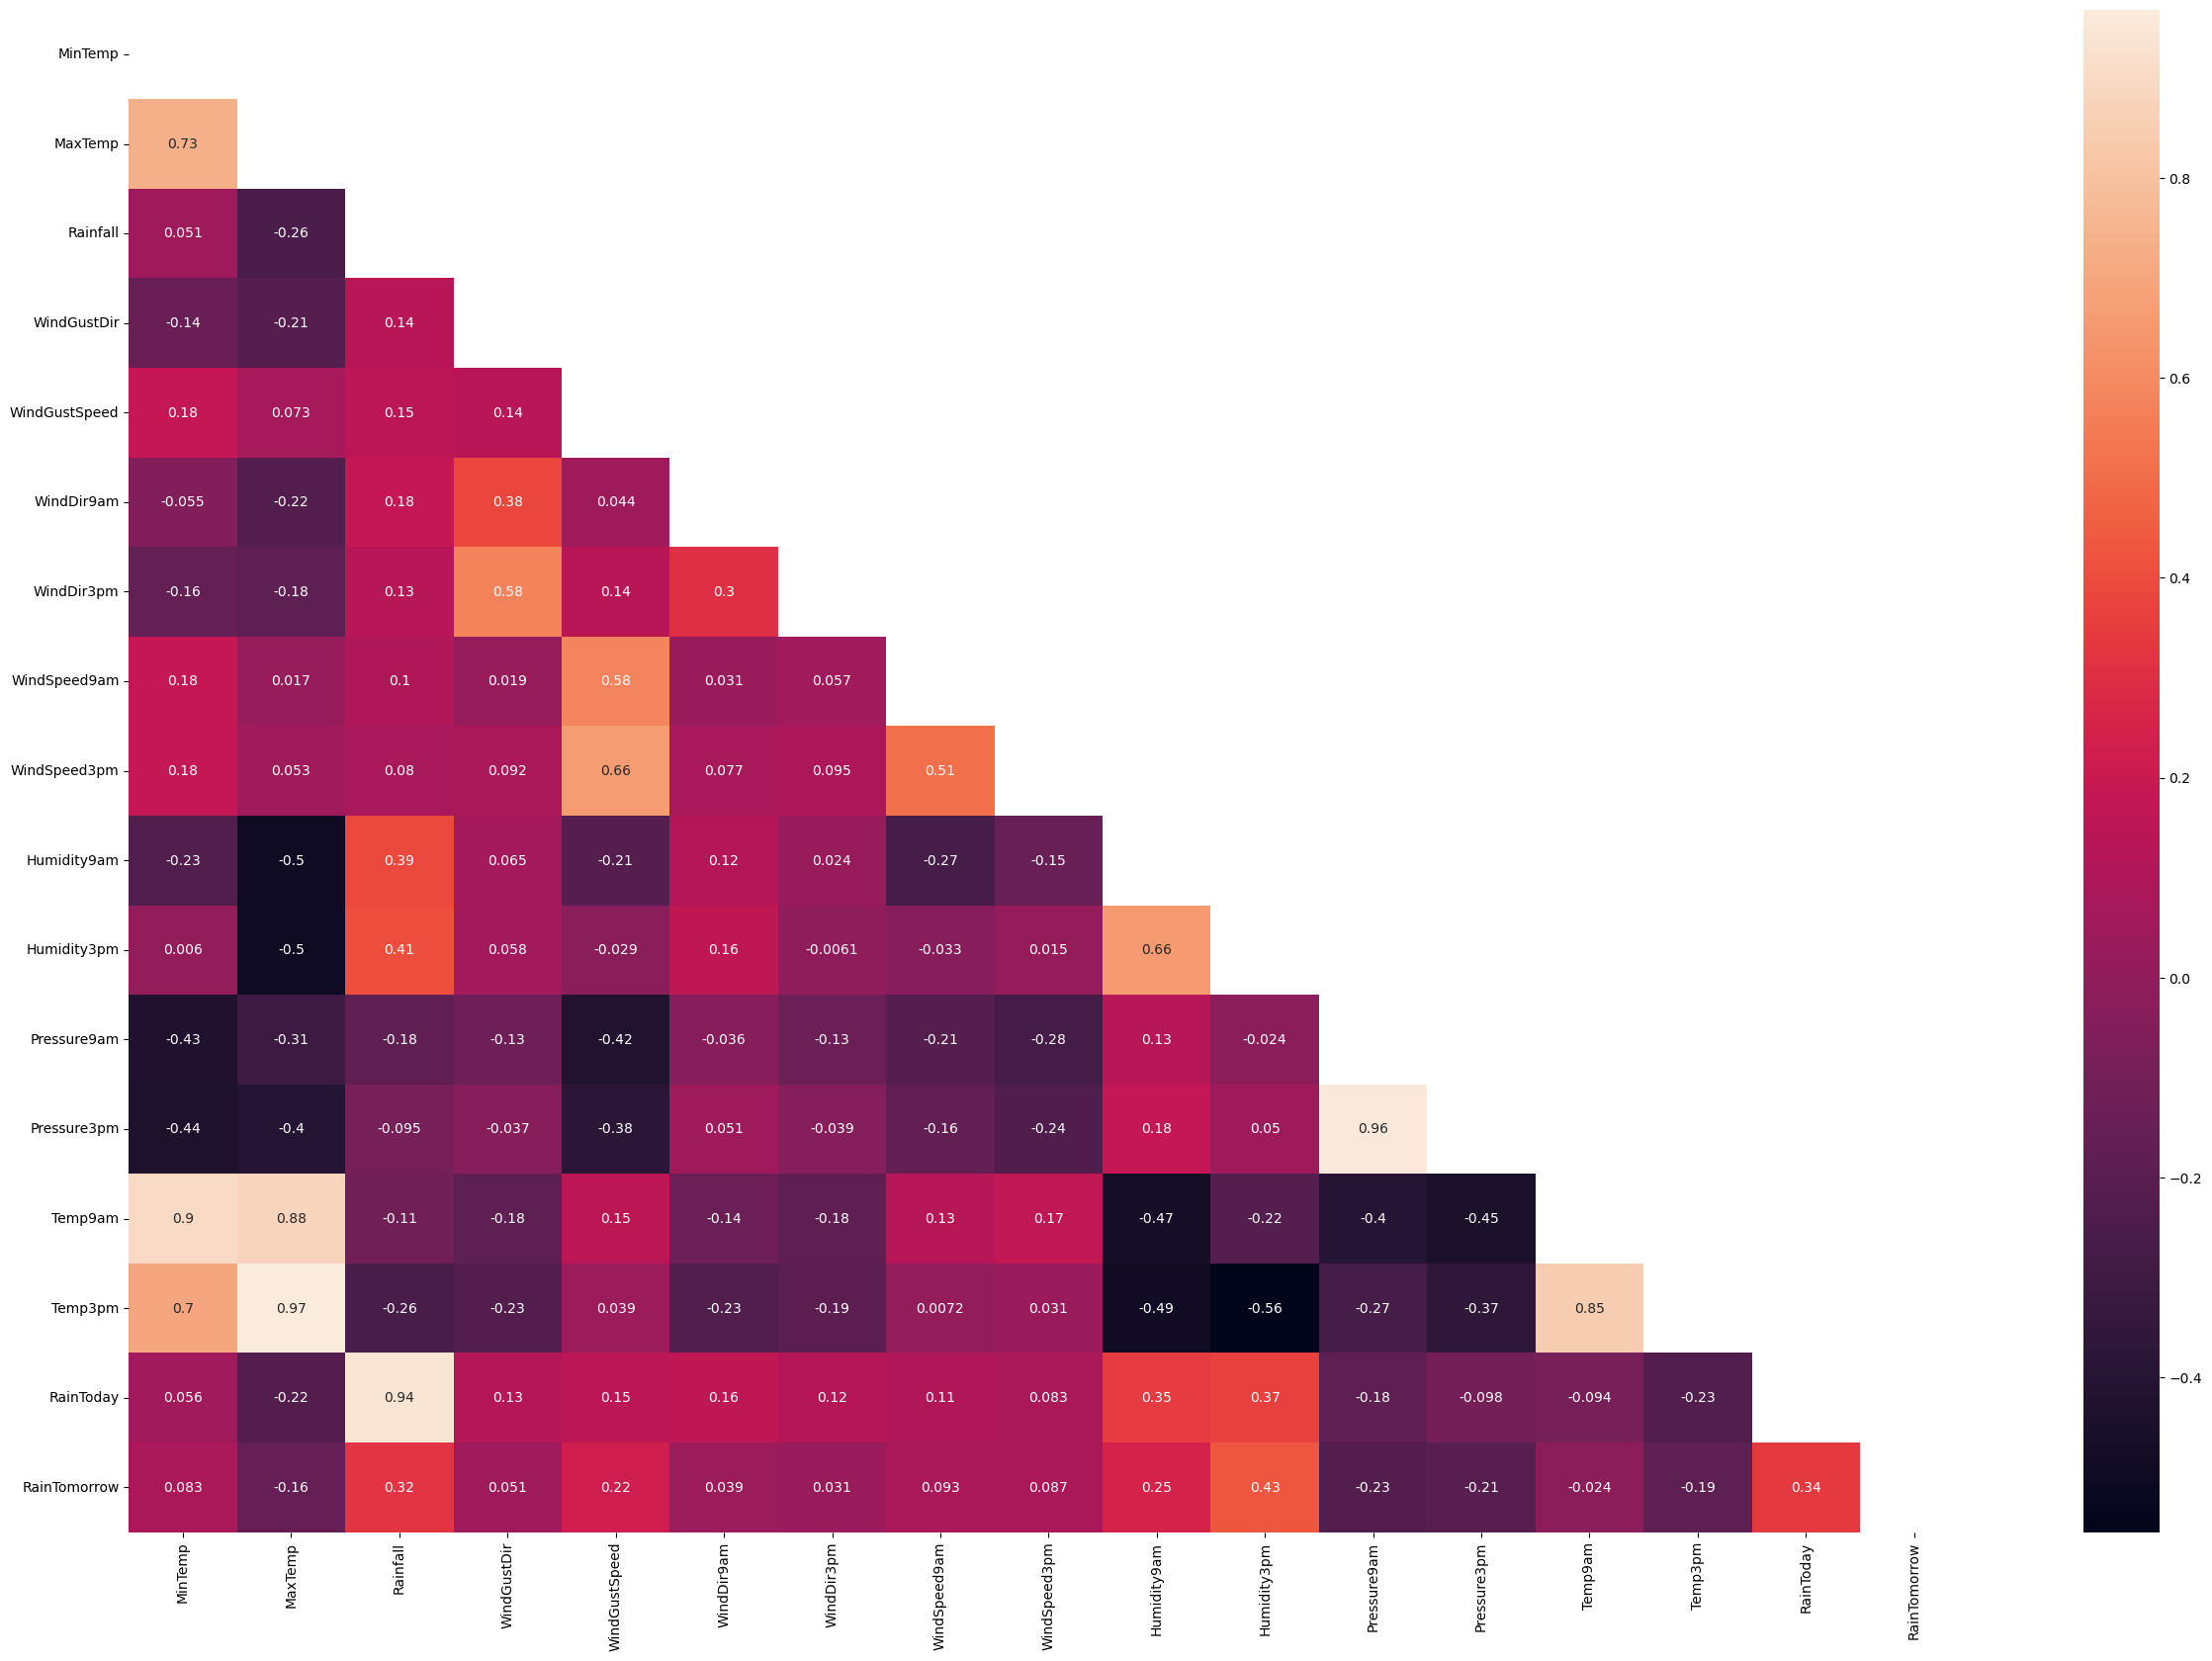

In [51]:
#plotting heatmap dengan correlation pada df1
plt.figure(figsize=(30,20))
sns.heatmap(dc2.corr(),annot=True, mask=np.triu(dc2.corr()))

In [52]:
dc2.corr()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733392,0.051203,-0.144093,0.180336,-0.054948,-0.159427,0.177534,0.177176,-0.230718,0.006033,-0.428982,-0.437161,0.897765,0.699147,0.055822,0.082917
MaxTemp,0.733392,1.000000,-0.255978,-0.213159,0.073229,-0.224225,-0.182246,0.017140,0.053117,-0.497111,-0.498544,-0.314920,-0.402168,0.879365,0.968905,-0.223812,-0.155167
Rainfall,0.051203,-0.255978,1.000000,0.140041,0.151293,0.177151,0.131543,0.102499,0.080050,0.387454,0.406205,-0.179751,-0.095155,-0.114011,-0.260283,0.944298,0.323225
WindGustDir,-0.144093,-0.213159,0.140041,1.000000,0.139326,0.380722,0.575890,0.019320,0.091642,0.064784,0.058240,-0.125857,-0.036757,-0.183008,-0.225877,0.127550,0.051141
WindGustSpeed,0.180336,0.073229,0.151293,0.139326,1.000000,0.043910,0.138297,0.578562,0.659350,-0.214349,-0.028868,-0.424191,-0.381720,0.154054,0.039421,0.152836,0.222785
WindDir9am,-0.054948,-0.224225,0.177151,0.380722,0.043910,1.000000,0.303762,0.030537,0.077271,0.123478,0.159273,-0.035912,0.051092,-0.138282,-0.229760,0.162657,0.039154
WindDir3pm,-0.159427,-0.182246,0.131543,0.575890,0.138297,0.303762,1.000000,0.056980,0.094528,0.023900,-0.006121,-0.134427,-0.039385,-0.175841,-0.191739,0.121509,0.031217
WindSpeed9am,0.177534,0.017140,0.102499,0.019320,0.578562,0.030537,0.056980,1.000000,0.507874,-0.273399,-0.033036,-0.214427,-0.164884,0.131738,0.007197,0.106527,0.092995
WindSpeed3pm,0.177176,0.053117,0.080050,0.091642,0.659350,0.077271,0.094528,0.507874,1.000000,-0.146602,0.015137,-0.276327,-0.237763,0.165858,0.031299,0.083049,0.086932
Humidity9am,-0.230718,-0.497111,0.387454,0.064784,-0.214349,0.123478,0.023900,-0.273399,-0.146602,1.000000,0.658850,0.133181,0.177319,-0.468540,-0.489627,0.345835,0.250911


Dari hasil di atas, diketahui bahwa korelasi antar kolom dengan kolom RainTomorrow yang paling tinggi yaitu Humidity3pm dengan nilai korelasi 0.429321.

In [53]:
# Defenisiskan data
X= dc2.drop('RainTomorrow', axis=1)
y= dc2['RainTomorrow']

In [54]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=761)

In [55]:
# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Cetak jumlah data pada masing-masing set
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)
print("Shape of X Train: ", X_train_scaled.shape)
print("Shape of Y Train: ", y_train.shape)
print("Shape of X Test: ", X_test_scaled.shape)
print("Shape of Y Test: ", y_test.shape)

Shape of X: (145460, 16)
Shape of Y: (145460,)
Shape of X Train:  (101822, 16)
Shape of Y Train:  (101822,)
Shape of X Test:  (43638, 16)
Shape of Y Test:  (43638,)


# 7. Logistic Regression

In [57]:
logreg = LogisticRegression()

In [58]:
# Melatih model
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [59]:
# Predict the respon
y_pred = logreg.predict(X_test_scaled)

In [60]:
# summary model
print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.86      0.94      0.90     33510
           1       0.71      0.47      0.57     10128

    accuracy                           0.83     43638
   macro avg       0.78      0.71      0.73     43638
weighted avg       0.82      0.83      0.82     43638



In [61]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[31577,  1933],
       [ 5331,  4797]], dtype=int64)

In [62]:
#Akurasi dari Logistic Regression
print('Akurasi untuk Logistic Regression Train:', logreg.score(X_train_scaled, y_train))
print('Akurasi untuk Logistic Regression Test:', logreg.score(X_test_scaled, y_test))

Akurasi untuk Logistic Regression Train: 0.8351338610516391
Akurasi untuk Logistic Regression Test: 0.8335395755992484


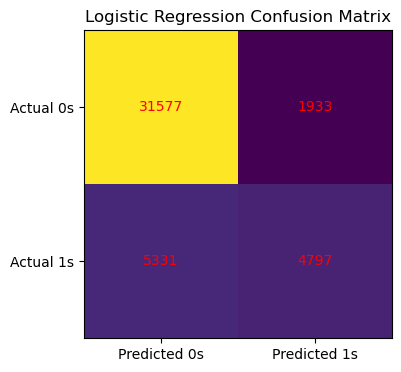

In [63]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Logistic Regression Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

1. Precision:
* Precision untuk kelas 0 : 0.86. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 86% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.71. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 71% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.94. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 94% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.47. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, hanya 47% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.90. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.57. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 33,510.
* Jumlah sampel yang merupakan kelas 1 adalah 10,128.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.83, yang menunjukkan bahwa sekitar 83% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.78, rata-rata recall adalah 0.71, dan rata-rata F1-score adalah 0.73.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.82, rata-rata recall adalah 0.83, dan rata-rata F1-score adalah 0.82.

# 8. Support Vector Machine

In [64]:
# Inisialisasi model SVM
svm = svm.SVC()

In [65]:
# Train model menggunakan training sets
svm.fit(X_train_scaled, y_train)

SVC()

In [66]:
# Membuat prediksi menggunakan testing set
y_pred_svm = svm.predict(X_test_scaled)

In [67]:
# summary model
print('\n\n')
print(classification_report(y_test, y_pred_svm))




              precision    recall  f1-score   support

           0       0.85      0.96      0.91     33510
           1       0.79      0.46      0.58     10128

    accuracy                           0.85     43638
   macro avg       0.82      0.71      0.74     43638
weighted avg       0.84      0.85      0.83     43638



In [68]:
#Confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[32247,  1263],
       [ 5471,  4657]], dtype=int64)

In [69]:
#Akurasi dari Support Vector Machine
import sklearn.metrics as metrics
print('Akurasi untuk Support Vector Machine:', metrics.accuracy_score(y_test, y_pred_svm))

Akurasi untuk Support Vector Machine: 0.8456849534809111


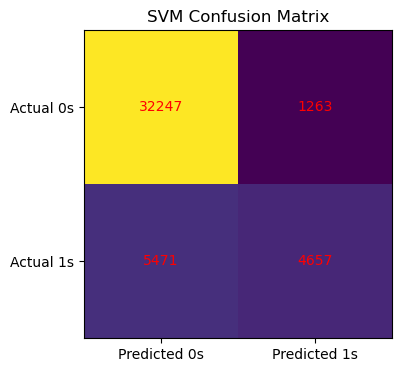

In [70]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(4,4))
plt.title("SVM Confusion Matrix")
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

1. Precision:
* Precision untuk kelas 0 : 0.85. Ini berarti dari semua sampel yang diprediksi sebagai kelas 0, 85% benar-benar merupakan kelas 0.
* Precision untuk kelas 1 : 0.79. Ini berarti dari semua sampel yang diprediksi sebagai kelas 1, 79% benar-benar merupakan kelas 1.

2. Recall:
* Recall untuk kelas 0: 0.96. Ini berarti dari semua sampel yang sebenarnya adalah kelas 0, 96% berhasil diidentifikasi dengan benar oleh model.
* Recall untuk kelas 1: 0.46. Ini berarti dari semua sampel yang sebenarnya adalah kelas 1, hanya 46% yang berhasil diidentifikasi dengan benar oleh model.

3. F1-Score:
* F1-score untuk kelas 0: 0.91. F1-score adalah ukuran yang mengkombinasikan precision dan recall, memberikan gambaran tentang sejauh mana model dapat mengidentifikasi kelas 0 dengan baik.
* F1-score untuk kelas 1: 0.58. F1-score untuk kelas 1 mencerminkan sejauh mana model dapat mengidentifikasi kelas 1 dengan baik.

4. Support:
* Jumlah sampel yang merupakan kelas 0 adalah 33,510.
* Jumlah sampel yang merupakan kelas 1 adalah 10,128.

5. Accuracy:
* Akurasi keseluruhan model adalah 0.85, yang menunjukkan bahwa sekitar 83% dari semua sampel telah diklasifikasikan dengan benar oleh model.

6. Macro Average:
* Rata-rata dari precision, recall, dan F1-score untuk semua kelas. Dalam hal ini, rata-rata precision adalah 0.82, rata-rata recall adalah 0.71, dan rata-rata F1-score adalah 0.71.

7. Weighted Average:
* Rata-rata dari precision, recall, dan F1-score yang diberi bobot berdasarkan jumlah sampel dalam masing-masing kelas. Dalam hal ini, rata-rata precision adalah 0.84, rata-rata recall adalah 0.85, dan rata-rata F1-score adalah 0.83.

# Kesimpulan

Dari hasil analisis di atas, dapat ditarik kesimpulan bahwa:
1. Temperatur maksimal paling tinggi berada di tahun 2007 dengan rata-rata 'MaxTemp' 25.086885.
2. Rata-rata temperatur minimum paling rendah berada di tahun 2012 dengan rata-rata 'MinTemp' 11.229217
3. Curah hujan paling tinggi wilayah Sydney [2008-2017] berada di tahun 2017
4. Wilayah dengan jumlah hari turunnya hujan paling banyak yaitu Melbourne dengan jumlah hari 1329 hari dan yang paling sedikit yaitu Uluru dengan jumlah hari 117 hari di tahun [2008-2017]
5. Support Vector Machine menunjukkan kinerja terbaik dengan akurasi 85% dibandingkan dengan Logistic Regression dengan akurasi 83%.